# Here's the story!
Investigating about what are the factors that associated with carrying, and buying guns,
we might ask:
What makes people go for a gun?
In which state in USA, people are looking to register their guns?

**Firstly, let's see what data do we have**

## Loading the data => df_census & df_gun

In [314]:
import pandas as pd
import zipfile # I just don't like to unzip archives on my device
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
with zipfile.ZipFile('ncis-and-census-data.zip', 'r') as z:
    # print(z.namelist()) ['U.S. Census Data.csv', 'gun_data.xlsx']
    with z.open(z.namelist()[0], 'r') as f:
        df_census = pd.read_csv(f)
    with z.open(z.namelist()[1], 'r') as f:
        df_gun = pd.read_excel(f)

In [315]:
df_census.head(2)

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  

[2 rows x 52 columns]

Here we have, two datasets are available:

1) df_census that contains a set of different facts about the people in each of the 50 states of USA

2) df_gun that contains numbers of eligbility checks performed to permit either carrying or buying a gun

df --> refers to DataFrame which is just another technical name for a tabular dataset

### Now, let's see our data further and check that it is well-organized for our analysis

## Assessing Data

In [316]:
print(f'df_census contains:\n\
    Number of Rows: {df_census.shape[0]}\n\
    Number of Columns: {df_census.shape[1]}\n\
    Number of Total Missing Values: {df_census.isnull().sum().sum()}\n\
    Number of Total Missing Values: {df_census.isnull().sum().sum()/pd.notna(df_census).sum().sum()*100:1.1f}%\n\
    Number of Duplicated Rows: {df_census.duplicated().sum()}')

print(f'df_gun contains:\n\
    Number of Rows: {df_gun.shape[0]}\n\
    Number of Columns: {df_gun.shape[1]}\n\
    Number of Total Missing Values: {df_gun.isnull().sum().sum()}\n\
    Percentage of Missing Values: {df_gun.isnull().sum().sum()/pd.notna(df_gun).sum().sum()*100:1.1f}%\n\
    Number of Duplicated Rows: {df_gun.duplicated().sum()}')

df_census contains:
    Number of Rows: 85
    Number of Columns: 52
    Number of Total Missing Values: 1062
    Number of Total Missing Values: 31.6%
    Number of Duplicated Rows: 3
df_gun contains:
    Number of Rows: 12485
    Number of Columns: 27
    Number of Total Missing Values: 154595
    Percentage of Missing Values: 84.7%
    Number of Duplicated Rows: 0


In [317]:
print('df_census dtypes:'.center(70,'-'))
print(df_census.dtypes)
print()
print('df_gun dtypes:'.center(70,'-'))
print(df_gun.dtypes)

--------------------------df_census dtypes:---------------------------
Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Okla

#### Location of missing values in df_census

In [318]:
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

#### Showing the missing values 
20 NaNs for each state in df_census

In [319]:
df_census[df_census.Alabama.isnull()]

Fact  \
65                                                NaN   
66  NOTE: FIPS Code values are enclosed in quotes ...   
67                                                NaN   
68                                        Value Notes   
69                                                  1   
70                                                NaN   
71                                         Fact Notes   
72                                                (a)   
73                                                (b)   
74                                                (c)   
75                                                NaN   
76                                        Value Flags   
77                                                  -   
78                                                  D   
79                                                  F   
80                                                 FN   
81                                                NaN   
82                                                  S   
83                                                  X   
84                                                  Z   

                                            Fact Note Alabama Alaska Arizona  \
65                                                NaN     NaN    NaN     NaN   
66                                                NaN     NaN    NaN     NaN   
67                                                NaN     NaN    NaN     NaN   
68                                                NaN     NaN    NaN     NaN   
69           Includes data not distributed by county.     NaN    NaN     NaN   
70                                                NaN     NaN    NaN     NaN   
71                                                NaN     NaN    NaN     NaN   
72           Includes persons reporting only one race     NaN    NaN     NaN   
73  Hispanics may be of any race, so also are incl...     NaN    NaN     NaN   
74  Economic Census - Puerto Rico data are not com...     NaN    NaN     NaN   
75                                                NaN     NaN    NaN     NaN   
76                                                NaN     NaN    NaN     NaN   
77  Either no or too few sample observations were ...     NaN    NaN     NaN   
78  Suppressed to avoid disclosure of confidential...     NaN    NaN     NaN   
79                                Fewer than 25 firms     NaN    NaN     NaN   
80             Footnote on this item in place of data     NaN    NaN     NaN   
81                                      Not available     NaN    NaN     NaN   
82    Suppressed; does not meet publication standards     NaN    NaN     NaN   
83                                     Not applicable     NaN    NaN     NaN   
84  Value greater than zero but less than half uni...     NaN    NaN     NaN   

   Arkansas California Colorado Connecticut Delaware  ... South Dakota  \
65      NaN        NaN      NaN         NaN      NaN  ...          NaN   
66      NaN        NaN      NaN         NaN      NaN  ...          NaN   
67      NaN        NaN      NaN         NaN      NaN  ...          NaN   
68      NaN        NaN      NaN         NaN      NaN  ...          NaN   
69      NaN        NaN      NaN         NaN      NaN  ...          NaN   
70      NaN        NaN      NaN         NaN      NaN  ...          NaN   
71      NaN        NaN      NaN         NaN      NaN  ...          NaN   
72      NaN        NaN      NaN         NaN      NaN  ...          NaN   
73      NaN        NaN      NaN         NaN      NaN  ...          NaN   
74      NaN        NaN      NaN         NaN      NaN  ...          NaN   
75      NaN        NaN      NaN         NaN      NaN  ...          NaN   
76      NaN        NaN      NaN         NaN      NaN  ...          NaN   
77      NaN        NaN      NaN         NaN      NaN  ...          NaN   
78      NaN        NaN      NaN         NaN      NaN  ...          NaN   
79      NaN        NaN      NaN         NaN      NaN  ...   

#### Let us look for the content of the 20 missing values for each state in df_census

In [320]:
df_census.iloc[65:85][['Fact', 'Fact Note']]
print('row | Fact | FactNote')
for  i, j in enumerate(zip(df_census.iloc[65:85]['Fact'], df_census.iloc[65:85]['Fact Note'])):
    if j[0] != j[0]:
        fact= ' '
    else:
        fact = j[0]
# NaN values not equal itself gives True. Thanks to: https://stackoverflow.com/questions/944700/how-can-i-check-for-nan-values        
    if j[1] != j[1]:
        note = ' '
    else:
        note = j[1]
    print(f' {i+65} | {fact} | {note}')

row | Fact | FactNote
 65 |   |  
 66 | NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact. |  
 67 |   |  
 68 | Value Notes |  
 69 | 1 | Includes data not distributed by county.
 70 |   |  
 71 | Fact Notes |  
 72 | (a) | Includes persons reporting only one race
 73 | (b) | Hispanics may be of any race, so also are included in applicable race categories
 74 | (c) | Economic Census - Puerto Rico data are not comparable to U.S. Economic Census data
 75 |   |  
 76 | Value Flags |  
 77 | - | Either no or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest or upper interval of an open ended distribution.
 78 | D | Suppressed to avoid disclosure of confidential information
 79 | F | Fewer than 25 firms
 80 | FN | Footnote on this item in place of data
 81 |   | Not available
 82 | S | Suppressed; does not meet publication standards
 

### Now the location the missing values in df_gun

In [321]:
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

<h3>Exploring df_census</h3>
By exploring df_census, we knew that it consists of 85 rows and 52 columns:</h3>

    df_census columns are [Fact, Fact Note] & a column for each of the 50 states


<h4>Missing values in df_census</h4>
    df_census contains some missing data, but with a deeper look "Fact Note" column is empty by default if nothing is to be noted
    "Fact Note" column consists of 57 NaN or empty cells - It's ok to leave them as they are<br>
    In addition, there are 20 empty instances for each state.<br>
    By investigation, it was found that frow row 65 till the end there are some general notes:
    <br>
    NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact. |  <br>
    1 | Includes data not distributed by county.<br>
    Fact Notes |
    (a) | Includes persons reporting only one race<br>
    (b) | Hispanics may be of any race, so also are included in applicable race categories<br>
    (c) | Economic Census - Puerto Rico data are not comparable to U.S. Economic Census data<br>
    - | Either no or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest or upper interval of an open ended distribution.<br>
    D | Suppressed to avoid disclosure of confidential information<br>
    F | Fewer than 25 firms<br>
    FN | Footnote on this item in place of data<br>
    S | Suppressed; does not meet publication standards<br>
    X | Not applicable<br>
    Z | Value greater than zero but less than half unit of measure shown<br>
</p>
    <u>TODO: Drop "Fact Note" column</u><br>
    <u>TODO: Now as we obtained these notes we can remove rows[64:84]</u>

<h4>Data types in df_census</h4>

<p>
Data types in df_census are string, although it has numbers about different facts for each state<br>
But, the numbers are gathered as string having the format 000,000<br>
Accordingly, these commas ',' in the number must be removed first then data types are converted to <b>floats</b>.<br>

<u>TODO: Remove commas in df_census all state columns values and converted their types to floats</ul>
</p>

<h3>Exploring df_gun</h3>
By exploring df_gun we knew that it consists of 12485 rows and 27 columns:
<p>
    df_gun columns are:<br>
    <b>* month column which contains the date of summarizing this data and month column is an object not a datetime.</b><br>
    <u>TODO: Convert "month" column in df_gun to datetime and extract year and month from it</u><br>
    In addition to "month", df_gun contains columns about number of checks for:<br>
    <b>* Number of checks for carrying a gun permit</b><br>
    <b>* Number of rechecking for carrying a gun permit</b><br>
    <b>* Number of checks for handgun purchases</b><br>
        <i>NOTE: Handgun—(a) is any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled. </i><br>
    <b>* Number of checks for long_gun purchases</b><br>
        <i>NOTE: Long Gun—a is weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either a number of ball shot or a single projectile for each single pull of the trigger. </i><br>
    <b>* Number of checks for other purchases </b><br>
        <i>NOTE: Other refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.</i><br>
    <b>* Number of checks for multiple type (handgun/long_gun/other) purchases </b><br>               

<h4>Types of transactions</h4>
<b>• The default type of transaction in df_gun are for:</b><br> Background checks initiated by an officially-licensed Federal Firearms Licensee (FFL) or criminal justice/law enforcement agency prior to the issuance of a firearm-related permit or transfer.  The indication of “multiple” denotes a background check where more than one type of firearm is associated to a 
single background check and “admin” denotes the administrative checks that are for other authorized uses of the NICS.
Other types of transactions are explained below:<br>
• <b>Pre-Pawn—background checks</b> requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.<br>
• <b>Redemption—background checks</b> requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.<br>
• <b>Returned/Disposition—background checks</b> requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.<br>
• <b>Rentals—background checks</b> requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.<br>
• <b>Private Sale—background checks</b> requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.<br>
• <b>Return to Seller-Private Sale—background checks</b> requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.<br><br>

> It is important to note that the statistics within this chart represent the number of firearm background checks initiated through the NICS.  They do not represent the number of firearms sold.  Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.


#### Missing values in df_gun

df_gun has so many missing values but from the data types and the fact that "total" column has no missing values.<br>
It was revealed that, all the missing values are not actually defective or missing information but rather they are <b>zeros</b>.<br>
<u>TODO: convert all missing values in df_gun to zero</u>


# Cleaning the Data

## Cleaning df_census

### Removing "Fact Note" column from df_census

In [322]:
if 'Fact Note' in df_census.columns:
    df_census.drop('Fact Note', axis=1, inplace=True)
print('Now, "Fact Note" column should disappear:')
df_census.head()

Now, "Fact Note" column should disappear:


Fact    Alabama   Alaska  \
0       Population estimates, July 1, 2016,  (V2016)  4,863,300  741,894   
1  Population estimates base, April 1, 2010,  (V2...  4,780,131  710,249   
2  Population, percent change - April 1, 2010 (es...      1.70%    4.50%   
3                  Population, Census, April 1, 2010  4,779,736  710,231   
4  Persons under 5 years, percent, July 1, 2016, ...      6.00%    7.30%   

     Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

      Florida  ... South Dakota Tennessee       Texas       Utah  Vermont  \
0  20,612,439  ...       865454   6651194  27,862,596  3,051,217  624,594   
1  18,804,592  ...       814195   6346298  25,146,100  2,763,888  625,741   
2       9.60%  ...        0.063     0.048      10.80%     10.40%   -0.20%   
3  18,801,310  ...       814180   6346105  25,145,561  2,763,885  625,741   
4       5.50%  ...        0.071     0.061       7.20%      8.30%    4.90%   

    Virginia Washington West Virginia  Wisconsin  Wyoming  
0  8,411,808  7,288,000     1,831,102  5,778,708  585,501  
1  8,001,041  6,724,545     1,853,011  5,687,289  563,767  
2      5.10%      8.40%        -1.20%      1.60%    3.90%  
3  8,001,024  6,724,540     1,852,994  5,686,986  563,626  
4      6.10%      6.20%         5.50%      5.80%    6.50%  

[5 rows x 51 columns]

### Removing rows 65 to 84 in df_census

In [323]:
if df_census.shape[0] == 85:
    df_census.drop(index=range(64,85), axis=0, inplace=True)
print('The original number of df_census rows was 85, but now it should be 64 only')
print(f'Number of df_census rows: {df_census.shape[0]}')

The original number of df_census rows was 85, but now it should be 64 only
Number of df_census rows: 64


### Check missing values in df_census

In [324]:
print(f'Number of missing values in df_census: {df_census.isnull().sum().sum()}')

Number of missing values in df_census: 0


### Adjusting data types in df_census

In [325]:
for col in df_census.columns[1:]:
    df_census[col]=df_census[col].str.replace(',','')
    df_census[col]=df_census[col].str.replace('%','')
    df_census[col]=df_census[col].str.replace('$','0',regex=False)
    df_census[col]=df_census[col].str.replace('D','')
    df_census[col]=df_census[col].str.replace("FN",'')
    df_census[col]=df_census[col].str.replace("Z",'')

In [326]:
for col in df_census.columns[1:]:
    # print(col)
    for i, row in enumerate(df_census[col]):
        # print(f"i={i} row={row}")
        if row == '':
            df_census[col][i] = 0
            
    df_census[col] = pd.to_numeric(df_census[col])
    # pd.to_numeric

C:\Users\----\AppData\Local\Temp\ipykernel_14868\1390646401.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [327]:
isfloat = True
for col in df_census.columns[1:]:
    if not df_census[col].dtype == float:
        print(f'Column {col} has some nonfloat values')
        isfloat = False

print('Is values converted successfully to floats:',isfloat)
        

Is values converted successfully to floats: True


df_census contains different facts many of them measured in 2010 and 2016
* 2010 facts shall be removed and keep 2016 facts as df_gun data collected in 2016 & 2017
* Population per square miles and land area in square miles are to be kept as there are only measured in 2010 only 

### Dropping 2010 facts

In [328]:
df_census.Fact
rmv_index=[]
for index, row in enumerate(df_census.Fact):
    if '2010' in row and not '2016' in row and not 'square' in row and not 'labor force' in row:
        rmv_index.append(index)
        # print(row.split(','))
if len(rmv_index) > 0: 
    df_census.drop(index=rmv_index,axis=0, inplace=True)
    df_census.drop(index=[1],axis=0,inplace=True)
df_census.reset_index(inplace=True,drop=True)

In [329]:
# Check
df_census.head(2)

Fact    Alabama    Alaska  \
0       Population estimates, July 1, 2016,  (V2016)  4863300.0  741894.0   
1  Population, percent change - April 1, 2010 (es...        1.7       4.5   

     Arizona   Arkansas  California   Colorado  Connecticut  Delaware  \
0  6931071.0  2988248.0  39250017.0  5540545.0    3576452.0  952065.0   
1        8.4        2.5         5.4       10.2          0.1       6.0   

      Florida  ...  South Dakota    Tennessee       Texas       Utah  \
0  20612439.0  ...    865454.000  6651194.000  27862596.0  3051217.0   
1         9.6  ...         0.063        0.048        10.8       10.4   

    Vermont   Virginia  Washington  West Virginia  Wisconsin   Wyoming  
0  624594.0  8411808.0   7288000.0      1831102.0  5778708.0  585501.0  
1      -0.2        5.1         8.4           -1.2        1.6       3.9  

[2 rows x 51 columns]

<!-- ### Renaming Fact values to make it simpler -->

In [330]:
# rename_new=[]
# rename_old=[]
# for i, row in enumerate(df_census.Fact):
#     if  'labor force' in row:
#         rename_old.append(
#             df_census['Fact'][i]
#         )
#         rename_new.append(
#             df_census['Fact'][i]
#         )
#     else:
#         rename_old.append(
#             df_census['Fact'][i]
#         )
#         rename_new.append(
#             df_census['Fact'][i].split(',')[0]
#         )
# df_census.Fact = pd.Series(rename_new)
#     # df_census['Fact'][i] = df_census["Fact"][i].split(',')[0]

In [331]:
# df_names = pd.DataFrame({'New Fact Name':rename_new,'Old Fact Name':rename_old})
# df_names

## Cleaning df_gun

### Replacing missing values with zeros in df_gun

In [332]:
df_gun.fillna(0, inplace=True)

In [333]:
print(f'''For df_gun:
Old number of missing values: 1062
Current/New number of missing values: {df_gun.isnull().sum().sum()}''')


For df_gun:
Old number of missing values: 1062
Current/New number of missing values: 0


### Are all states in df_census exist in df_gun?

In [334]:
# I want to ensure that df_census has all states data and there's no missing states
similar = 0
not_found = 0
for i in df_gun['state'].drop_duplicates():
    if i in df_census.columns: #index has the names of states
        similar +=1
    else:
        not_found +=1
        print(i)

print('Do all states in df_census exist in df_gun as well?')
if not_found != 0:
    print('NO!')
else:
    print('YES!')
    
print()
print(f'Similar: {similar}\n\
Not found in df_gun: {not_found}')

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands
Do all states in df_census exist in df_gun as well?
NO!

Similar: 50
Not found in df_gun: 5


The United States of America has 50 states. However, USA contains some territories that are not actually states.
All 50 states are common in both df_census & df_gun data.

**The following territories exist only in df_gun:**
- District of Columbia
- Guam
- Mariana Islands
- Puerto Rico
- Virgin Islands

<u>TODO: Add "Fact" column content <b>(64 facts)</b> in df_census to each state in df_gun except for ['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'] </u>

In [335]:
for state in df_census.columns: # columns are states
    if not state in ['Fact', 'District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']:
        for i, fact in enumerate(df_census.Fact):
            df_gun.loc[df_gun.state == state, fact] = df_census[state][i]

### After adding Facts, the previous five territories will have missing values in df_gun
> So, we will drop remaining missing values


In [336]:
df_gun.dropna(inplace=True)

In [337]:
print(f'''For df_gun:
Old number of columns: 27
Current/New number of columns : {df_gun.shape[1]} (64 facts + 27 exisiting columns = 91)''')


For df_gun:
Old number of columns: 27
Current/New number of columns : 84 (64 facts + 27 exisiting columns = 91)


### Extracting month and year for "month" column in df_gun

In [338]:
if 'month' in df_gun.columns and not 'date' in df_gun.columns:
    if 'year' not in df_gun.columns:
        df_gun.rename(columns={'month':'date'}, inplace=True)
        df_gun.date = pd.to_datetime(df_gun.date)

if 'year' not in df_gun.columns:
    df_gun.insert(1, 'year', df_gun.date.dt.year)
if 'month' not in df_gun.columns:
    df_gun.insert(2, 'month', df_gun.date.dt.month)
if 'date' in df_gun.columns:
    df_gun.drop('date', axis=1, inplace=True)

In [339]:
# Check year & month columns
df_gun.head(2)

year  month    state   permit  permit_recheck  handgun  long_gun  other  \
0  2017      9  Alabama  16717.0             0.0   5734.0    6320.0  221.0   
1  2017      9   Alaska    209.0             2.0   2320.0    2930.0  219.0   

   multiple  admin  ...  Total nonemployer establishments, 2015  \
0       317    0.0  ...                                322025.0   
1       160    0.0  ...                                 55521.0   

   All firms, 2012  Men-owned firms, 2012  Women-owned firms, 2012  \
0         374153.0               203604.0                 137630.0   
1          68032.0                35402.0                  22141.0   

   Minority-owned firms, 2012  Nonminority-owned firms, 2012  \
0                     92219.0                       272651.0   
1                     13688.0                        51147.0   

   Veteran-owned firms, 2012  Nonveteran-owned firms, 2012  \
0                    41943.0                      316984.0   
1                     7953.0                       56091.0   

   Population per square mile, 2010  Land area in square miles, 2010  
0                              94.4                         50645.33  
1                               1.2                        570640.95  

[2 rows x 85 columns]

### Dropping missing values in df_gun

In [340]:
df_gun.dropna(inplace=True)

### Creating a new columns in df_gun to state whether the record from 1998:2010 or 2011:2017

In [341]:
df_before_2010 = df_gun[df_gun.year.isin(range(1998,2011))]
df_after_2010 = df_gun[df_gun.year.isin(range(2011,2018))]
df=df_gun

In [342]:
df_gun.insert(0,'before/after','')
before = df_gun.year.isin(range(1998,2011))
after = df_gun.year.isin(range(2011,2018))
df_gun.loc[before, 'before/after'] = '1998:2010'
df_gun.loc[after, 'before/after'] = '2011:2017'

In [343]:
df_gun['before/after'].value_counts()

1998:2010    7300
2011:2017    4050
Name: before/after, dtype: int64

In [344]:
df_before_2010.year.value_counts()

2010    600
2009    600
2008    600
2007    600
2006    600
2005    600
2004    600
2003    600
2002    600
2001    600
2000    600
1999    600
1998    100
Name: year, dtype: int64

In [345]:
df_after_2010.year.value_counts()

2016    600
2015    600
2014    600
2013    600
2012    600
2011    600
2017    450
Name: year, dtype: int64

## Exploratory Data Analysis

#### The average number of checks for each state in df_gun

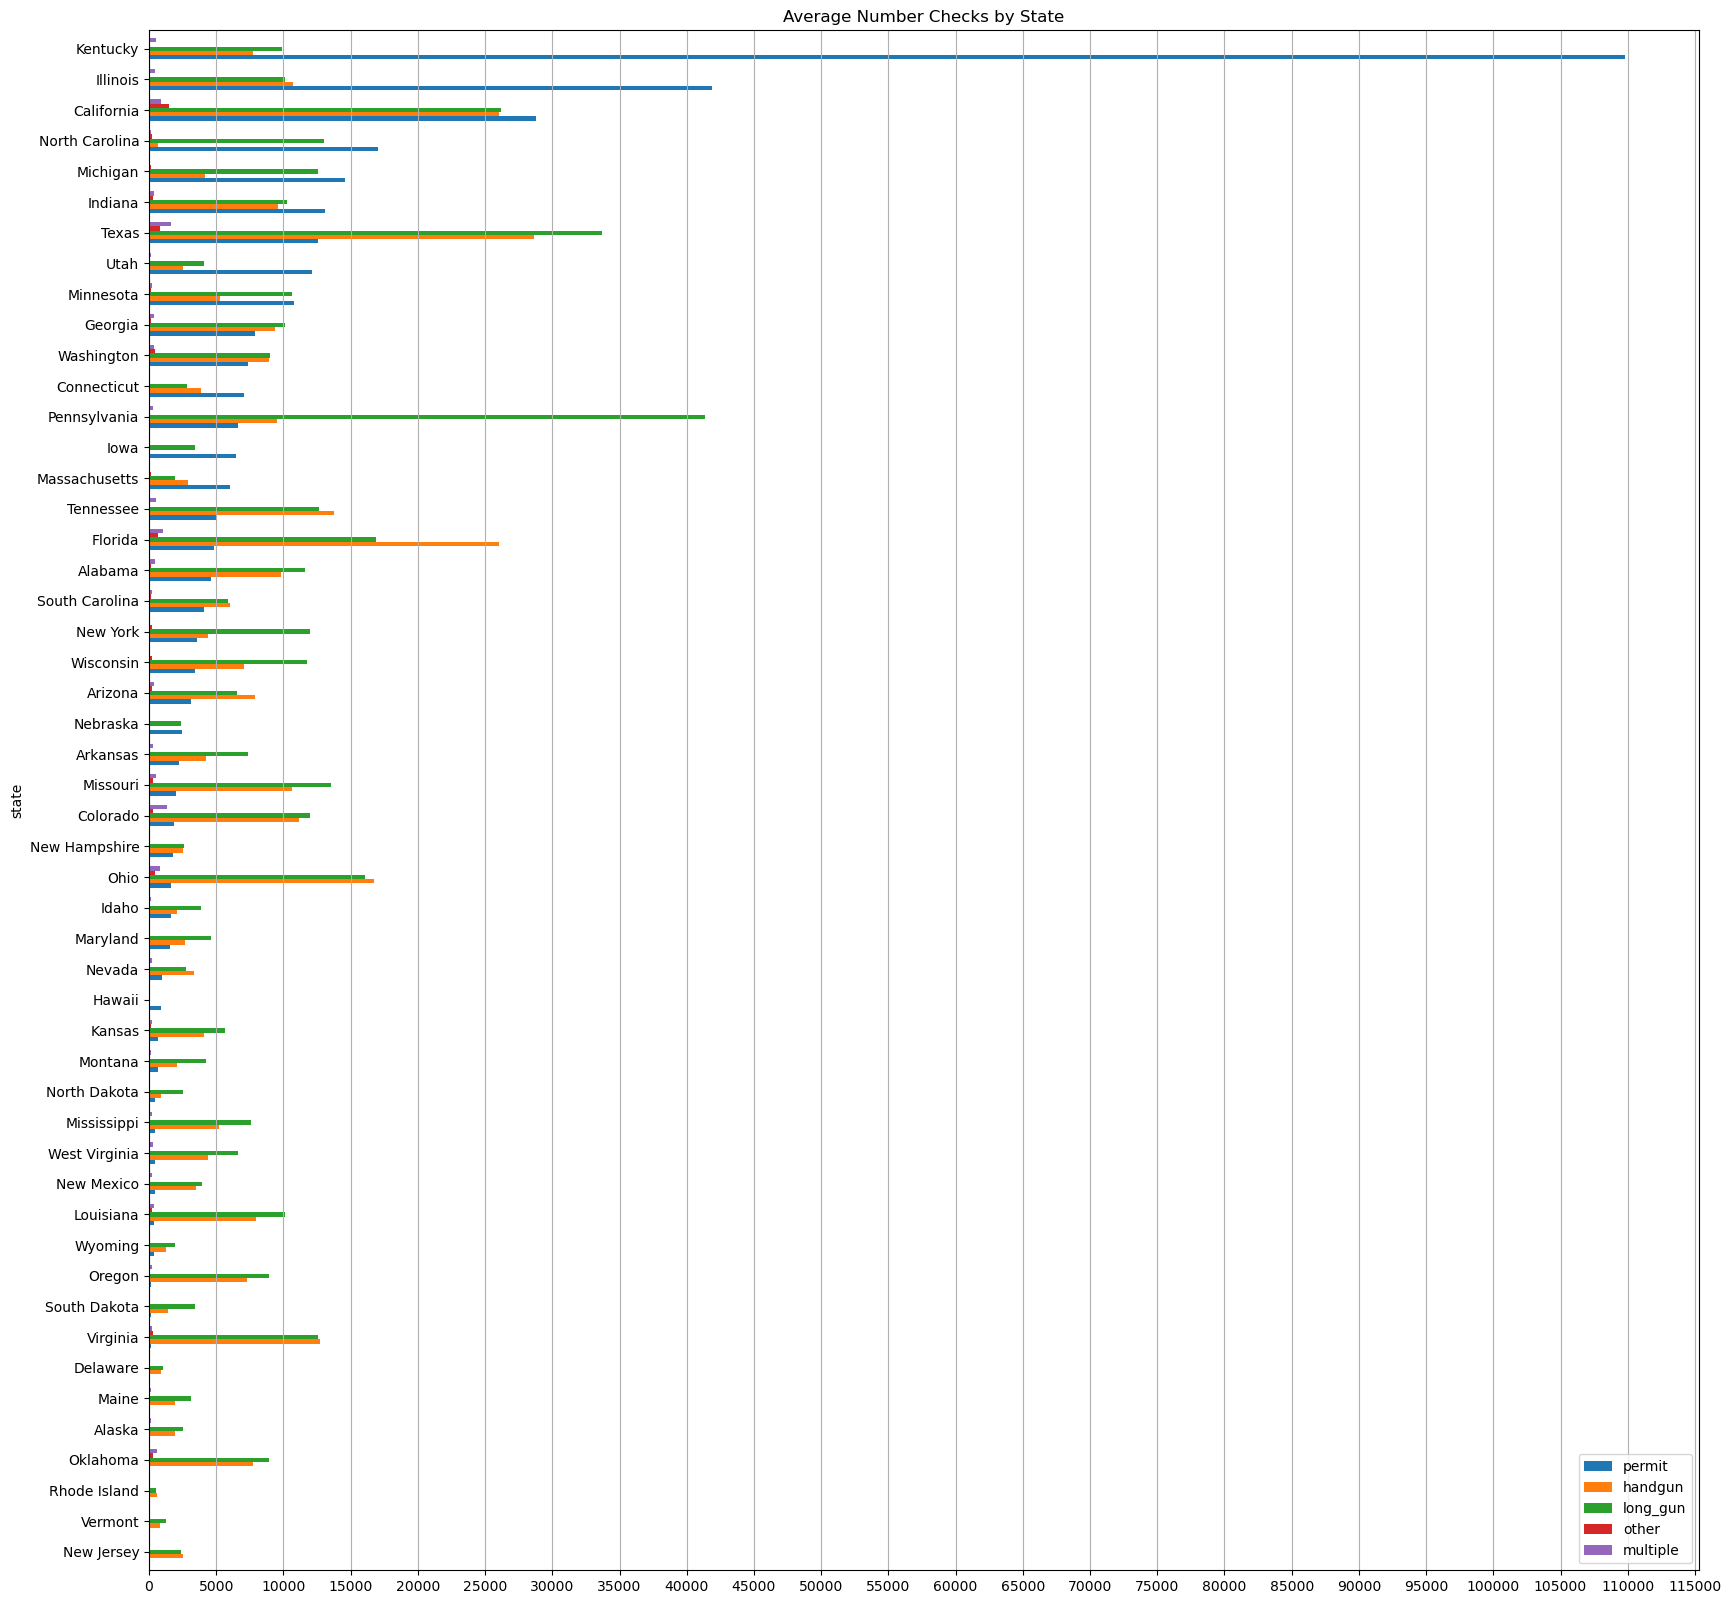

In [404]:
fields = ['permit','handgun','long_gun','other', 'multiple']
 # change sortby as desired
df_gun.groupby('state')[fields].mean().sort_values(by=fields[0]).plot.barh(figsize=(20,20), title='Average Number Checks by State', width=0.7);
plt.locator_params(axis='x', nbins=40)
plt.gca().xaxis.grid(True)


> The graph shows what states have a significant number of checks on average in the period from 1998 till 2017 inclusively.
>> * Kentucky state has an extreme number of carry permit checks followed by Illinois state. The two states have signifcant increased number of carry permits<br>
>> * Texas, Florida, and California states have the highest handgun checks on average.<br>
>> * Pennsylvannia state has the biggest number of long_gun check which is might be associated with hunting activities or other activities requiring such types of guns.<br>
>> * Multiple type checks are very rare. However, Texas and Colorado are the highest concerning multiple type checks.<br>

### Naming states with top 10 states of the overall average number of checks:
- California
- Texas
- Florida
- Illinois
- Pennsylvania
- Kentucky
- Ohio
- Colorado
- North Carolina
- Michigan

In [391]:
df_census.Fact.value_counts().count()

57

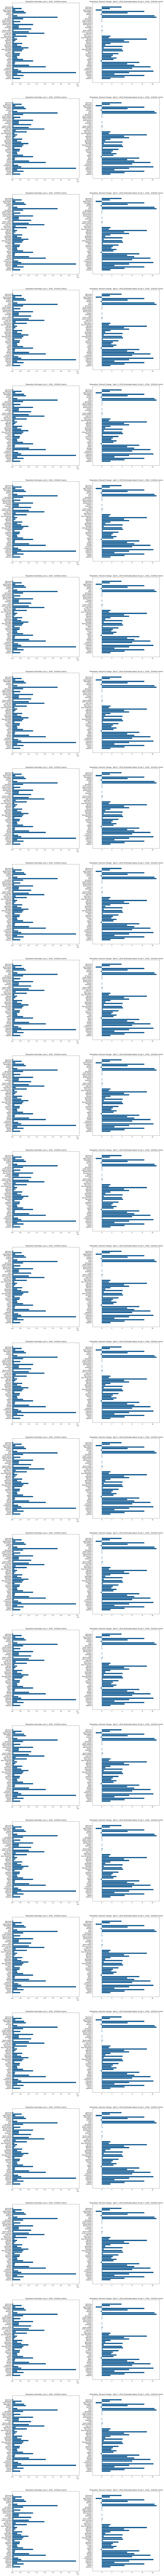

In [403]:
fig, axs = plt.subplots(27, 2)
n=-1
for i, col in enumerate(df_census.Fact):
    n+=1
    if n == 2:
        break
    for j in range(27):
        h1 = df_gun.groupby('state')[col].mean()
        heights = h1
        # labels = ['1998:2010','2011:2017']
        fig.set_figheight(350)
        fig.set_figwidth(20)
        # print(f'j={j} n={n}') # test print
        axs[j,n].barh(width=heights, y=states, color=['#0D578F'])
        # if i == 2 and n == 0:
        #     fig.delaxes(axs[n+1][i])
        axs[j,n].set_title(f" {col.title()} ")

In [348]:
top = ["California", "Texas", "Florida", "Illinois", "Kentucky", "Ohio", "Colorado", "North Carolina", "Michigan", "Pennysylvania"]

# Drawing Conclusions

### How did the average number of various types of checks varied before and after 2016?

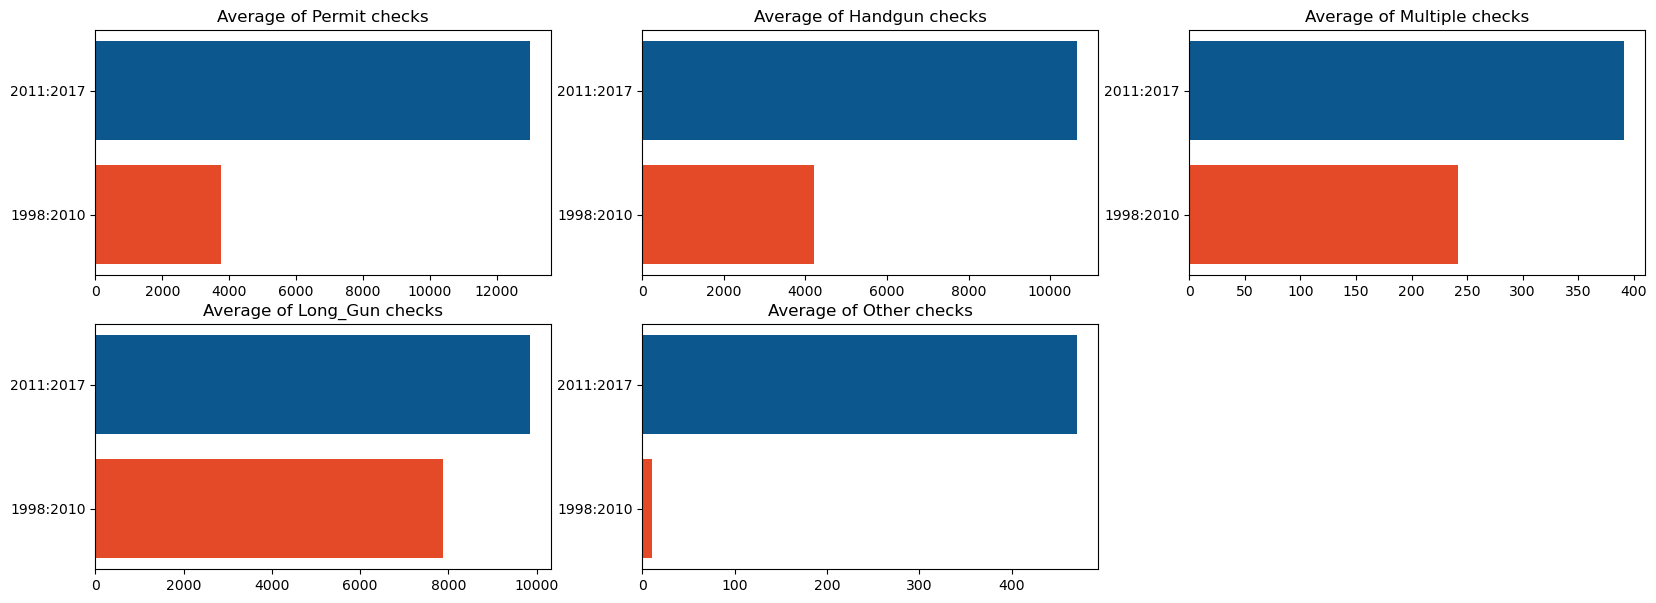

In [349]:
fig, axs = plt.subplots(2, 3)
n=0
# plt.figure(figsize=(20,5))
for i, col in enumerate(['permit','handgun','long_gun','other','multiple']):
    if i>=2:
        n+=1
        i-=2
    if n>=2:
        n-=3
    h1 = df_before_2010[col].mean()
    h2 = df_after_2010[col].mean()
    heights = [h1, h2]
    labels = ['1998:2010','2011:2017']
    fig.set_figheight(7)
    fig.set_figwidth(20)
    # print(f'n={n} i={i}') # test print
    axs[n,i].barh(width=heights, y=labels, color=['#E44A28','#0D578F'])
    if i == 2 and n == 0:
        fig.delaxes(axs[n+1][i])
    axs[n,i].set_title(f"Average of {col.title()} checks")

> From the previous graph, the average of the number of all types of checks have increased alot after 2010 and till 2017.
>> * Other types checks have the greatest difference; which is might be related to the advancement of the weaponary accessories and parts which were very rare before.<br>
>> * The least difference is in the Long Gun checks; and that might be justified as the hunting activities are usually associated with long guns like shotguns and rifles and hunting was common both previously and currently.


### How the number of checks changed in each state before and after 2010?

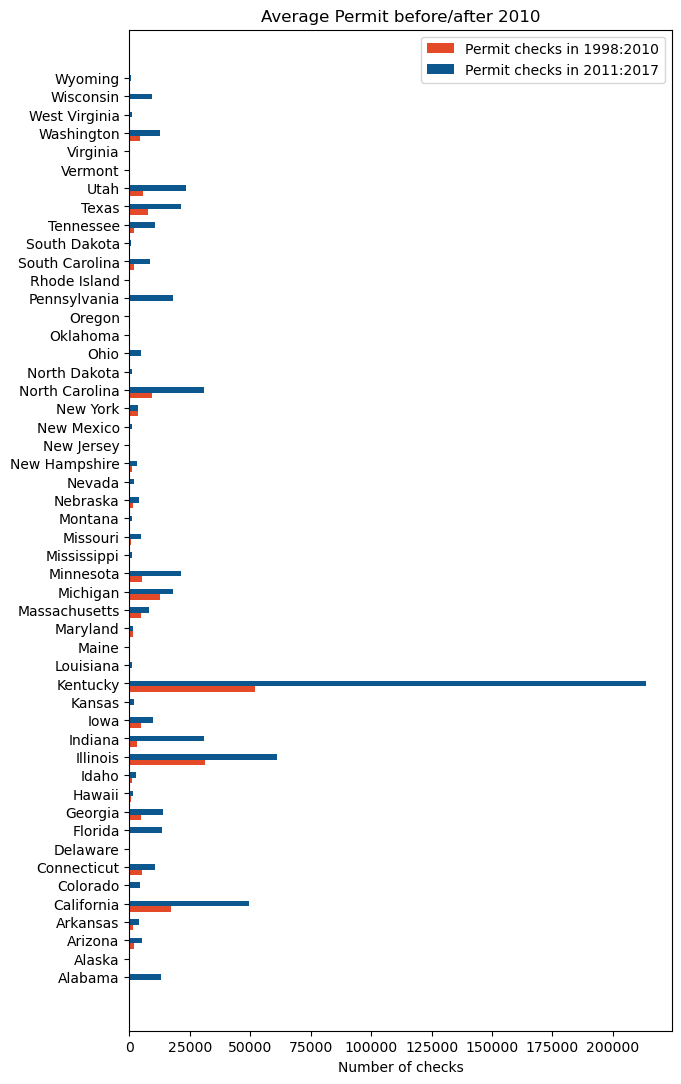

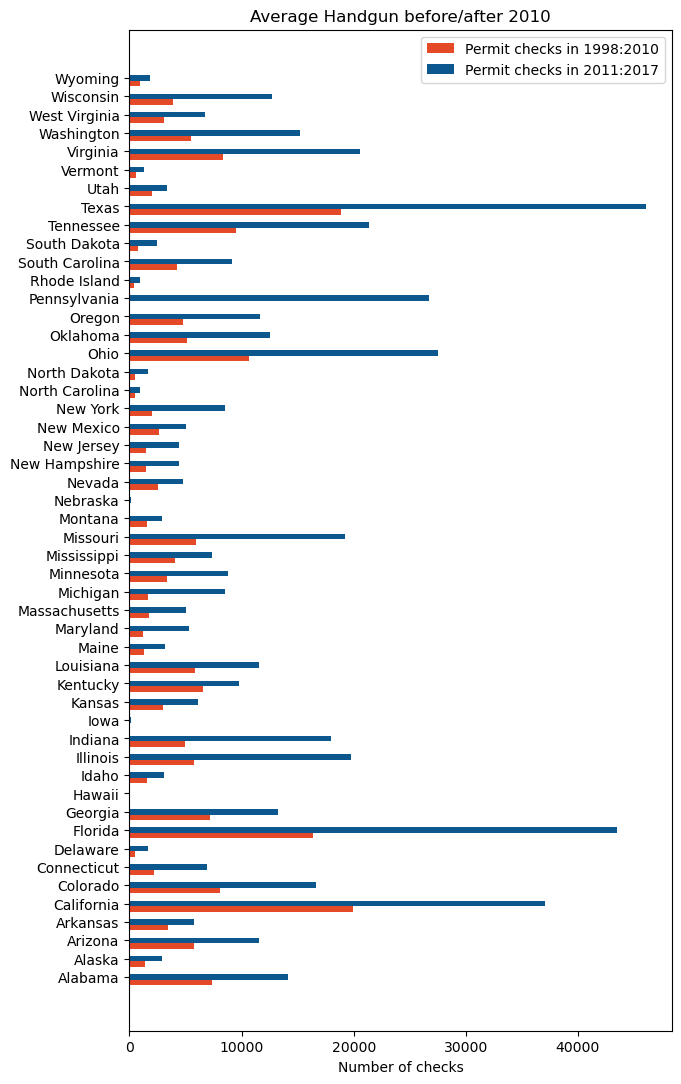

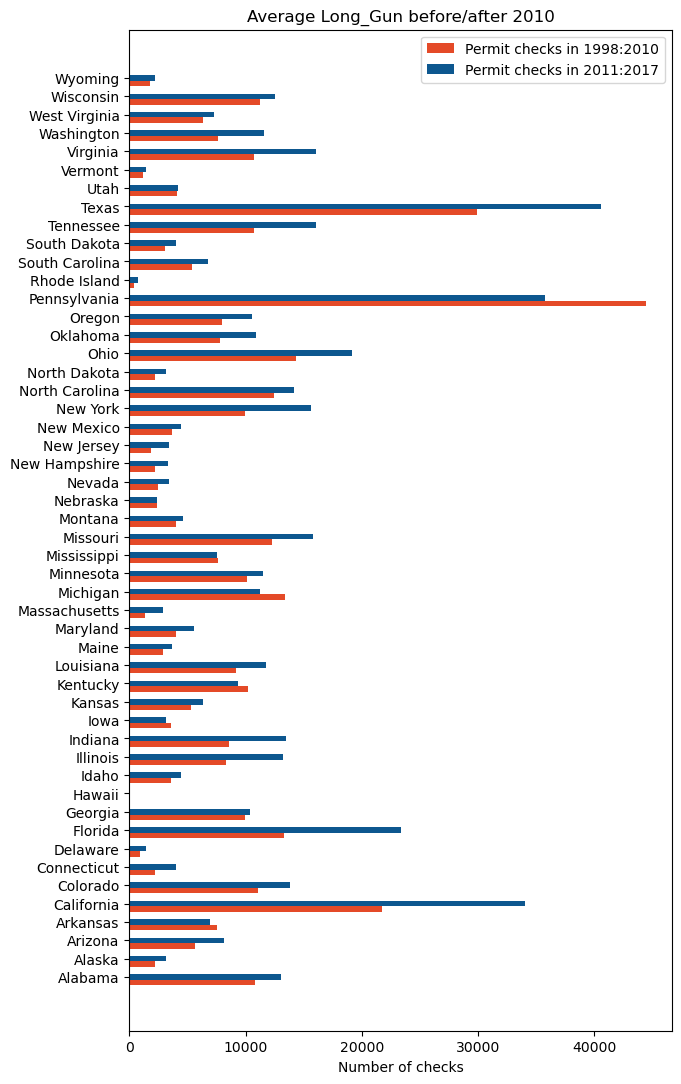

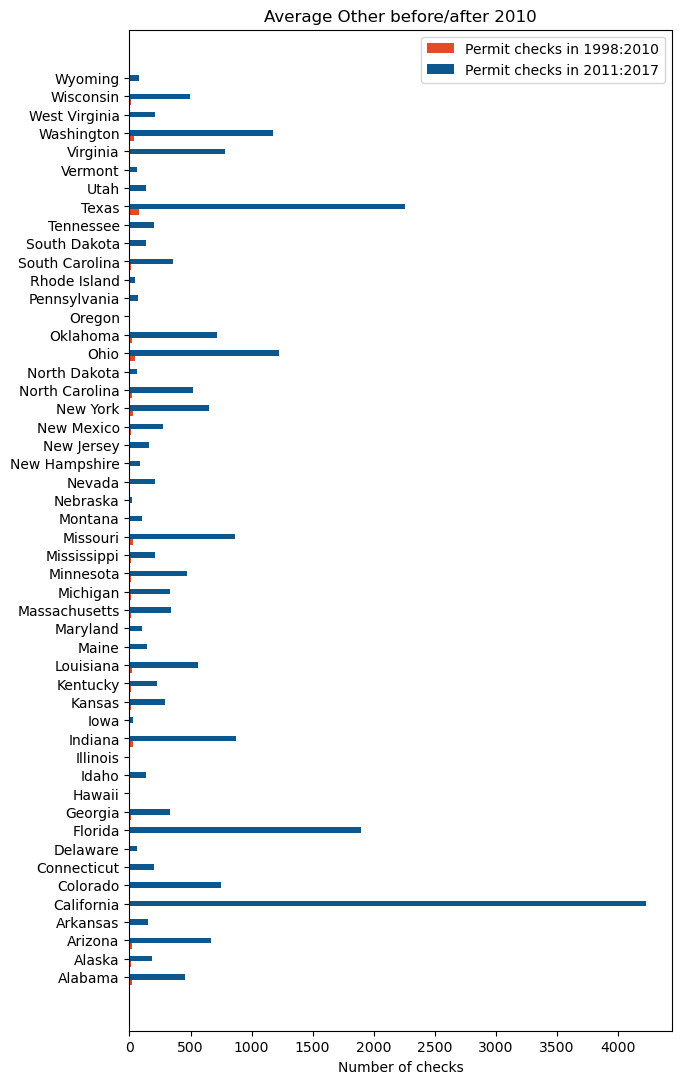

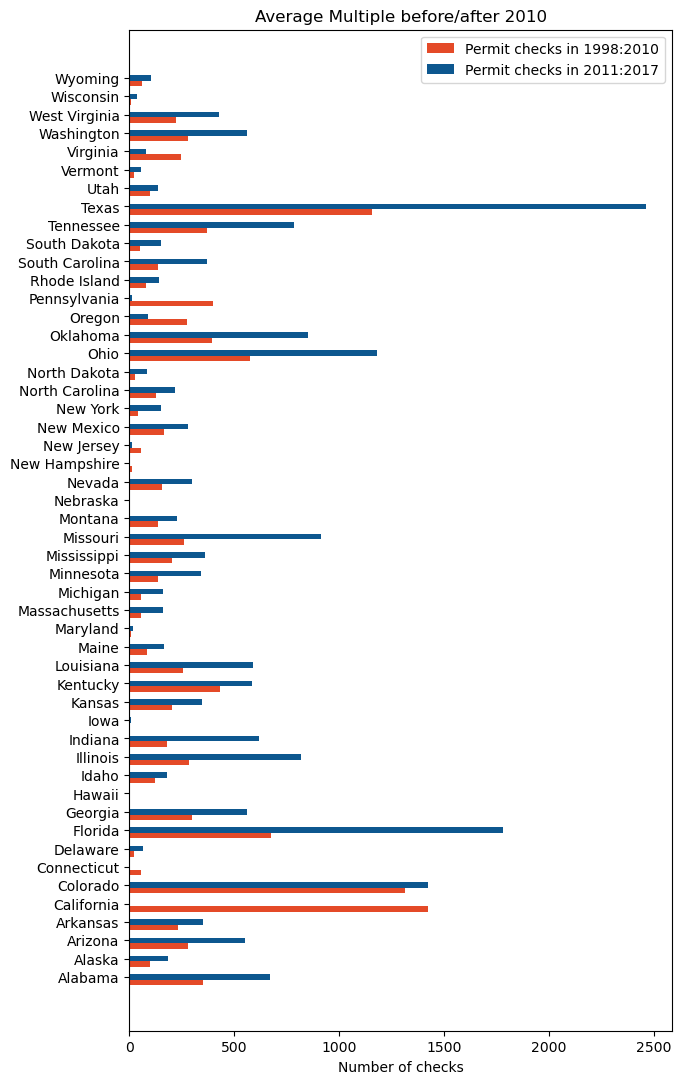

In [380]:
states = df_census.columns[1:]
for check in fields:
    permit_meansold = []
    permit_meansnew = []
    height = 0.3
    for state in states:
        permit_meansold.append(df_before_2010[df_before_2010.state == state][check].mean())
        permit_meansnew.append(df_after_2010[df_after_2010.state == state][check].mean())

    plt.figure(figsize=(7, 13))
    y_indexes = np.arange(len(permit_meansold))
    plt.barh(y=y_indexes-height, width=permit_meansold, height=height, label='Permit checks in 1998:2010', color='#E44A28')
    plt.barh(y=y_indexes, width=permit_meansnew, height=height, label='Permit checks in 2011:2017', color='#0D578F')
    plt.title(f'Average {check.title()} before/after 2010')
    plt.yticks(ticks=y_indexes,labels=states)
    plt.xlabel('Number of checks')
    plt.legend()
    plt.show()

#### What are the factors that affect the high permit check in Kentucy?

In [351]:
facts=[]
for c, col in enumerate(df_gun.columns):
    if c>27:
        print(f'{c-28} {col}')
        facts.append(col)

0 totals
1 Population estimates, July 1, 2016,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Persons under 5 years, percent, July 1, 2016,  (V2016)
4 Persons under 18 years, percent, July 1, 2016,  (V2016)
5 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
6 Female persons, percent,  July 1, 2016,  (V2016)
7 White alone, percent, July 1, 2016,  (V2016)
8 Black or African American alone, percent, July 1, 2016,  (V2016)
9 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
10 Asian alone, percent, July 1, 2016,  (V2016)
11 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
12 Two or More Races, percent, July 1, 2016,  (V2016)
13 Hispanic or Latino, percent, July 1, 2016,  (V2016)
14 White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)
15 Veterans, 2011-2015
16 Foreign born persons, percent, 2011-2015
17 Housing units,  July 1, 2016,  (V2016)
18 Owner-occupie

What is the reason for the high various checks types in 
* California
* Texas
* Pennsylvania
* Florida
* Illinois
* Kentucky
* Minnesota
* Indiana